In [2]:
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [3]:
api_wrapper_arxiv = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=200)
arxiv = ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description =" Arxiv Query papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke('Attention is all you need')

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervi"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=2,doc_content_chars_max=200)
wikipedia = WikipediaQueryRun(api_wrapper=api_wrapper_wiki,description="Wikipedia query ")
print(wikipedia.name)

wikipedia


In [13]:
wikipedia.invoke('Dr Rajkumar')

'Page: Dr. Rajkumar\nSummary: Singanalluru Puttaswamaiah Muthuraj (24 April 1929 – 12 April 2006), better known by his stage name Dr. Rajkumar, was an Indian actor and singer who worked in Kannada cinem'

In [6]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ['TAVILY_API_KEY']= os.getenv('TAVILY_API_KEY')
os.environ['OPENAI_API_KEY']=os.getenv('OPENAI_API_KEY')

In [8]:
from langchain_community.tools.tavily_search import TavilySearchResults


tavily = TavilySearchResults()
tavily.invoke('Who is Shashank Singh')

[{'url': 'https://crictoday.com/cricket/series/shashank-singh/',
  'content': 'Shashank Singh, known as Badshah, is a cricketer from Bhilai, Chhattisgarh. He is a right-handed batsman and a right-arm medium bowler. He plays for India and the IPL team Punjab Kings. Singh’s domestic team is Mumbai and he has played for Mumbai Cricket Association XI, Chhattisgarh, and the IPL teams Sunrisers Hyderabad, Punjab Kings, Delhi Capitals, and Rajasthan Royals. He is an allrounder for the team.\n\n## SHASHANK SINGH BIOGRAPHY [...] |  |  |\n| --- | --- |\n| **FULL NAME** | Shashank Singh |\n| **NICKNAME** | Badshah |\n| **PLACE OF BIRTH** | Bhilai, Chhattisgarh |\n| **BORN** | 21 November 1991 |\n| **HEIGHT** | 5 ft 11 in |\n| **EYE COLOUR** | Black |\n| **JERSEY NO** | 18 |\n| **TEAM** | [India](https://crictoday.com/cricket/series/india-national-cricket-team/) |\n| **IPL** | [Punjab Kings](https://crictoday.com/cricket/series/punjab-kings/), 2022 (Sunrisers Hyderabad) |\n| **BATTING STYLE** | Ri

In [16]:
tavily.invoke('Give me 5 recent genAI news of June 2025')

[{'url': 'https://www.ncnewsonline.com/news/national/cmo-confidence-in-genai-is-higher-than-ever-with-over-80-expressing-optimism/article_c48c4f41-d9ce-5540-8cbd-d319be53c5c1.html',
  'content': 'BOSTON, June 2, 2025 /PRNewswire/ -- Despite economic volatility, 71% of CMOs plan to invest more than $10 million annually in GenAI over the next three years, up from 57% last year. According to a new survey from [Boston Consulting Group (BCG)](https://c212.net/c/link/?t=0&l=en&o=4439293-1&h=3592626348&u=http%3A%2F%2Fwww.bcg.com%2F&a=Boston+Consulting+Group+(BCG)), optimism among CMOs about GenAI has climbed each year—from 74% in 2023 to 83% in 2025—while concerns have declined rapidly. [...] ![site-logo](https://bloximages.chicago2.vip.townnews.com/ncnewsonline.com/content/tncms/assets/v3/media/c/1c/c1cb295e-a570-11ec-8f10-1335a180e343/623257b8c0735.image.png?resize=200%2C37)\n\n\n#### New Castle, PA (16105)\n\n##### Today\n\nSunny. High 76F. Winds W at 5 to 10 mph..\n\n##### Tonight\n\nClea

In [9]:
tools =[arxiv,wikipedia,tavily]

In [10]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(temperature =0.7,model='gpt-3.5-turbo')
llm.invoke('Who is Dr Rajkumar')


AIMessage(content='Dr. Rajkumar was a famous Indian actor and singer who worked predominantly in the Kannada film industry. He is considered one of the greatest actors in the history of Indian cinema and is often referred to as "Annavru" (elder brother) by his fans. Dr. Rajkumar starred in over 200 films in a career spanning more than five decades and was known for his versatility and powerful performances. He was also a playback singer and has sung many popular songs in Kannada films. Dr. Rajkumar received numerous awards and accolades throughout his career, including multiple National Film Awards and Karnataka State Film Awards. He passed away in 2006 at the age of 77.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 141, 'prompt_tokens': 13, 'total_tokens': 154, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens

In [11]:
llm_with_tools = llm.bind_tools(tools=tools)

In [12]:
llm_with_tools.invoke('Whats the latest news ob=n GenAI')

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_UH4yUQ5OAoUmouVCRhAu09r1', 'function': {'arguments': '{"query":"GenAI latest news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 143, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-54a068d0-e977-43b5-b91a-9eafe4dd7806-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'GenAI latest news'}, 'id': 'call_UH4yUQ5OAoUmouVCRhAu09r1', 'type': 'tool_call'}], usage_metadata={'input_tokens': 143, 'output_tokens': 21, 'total_tokens': 164, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_

In [22]:
llm_with_tools.invoke('Whois SRK')

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4frSa8E7W38UeajGEZhIDtww', 'function': {'arguments': '{"query":"SRK"}', 'name': 'wikipedia'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 14, 'prompt_tokens': 139, 'total_tokens': 153, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-b3e113db-8bef-4ad1-bfaf-19bc57aa4fd3-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'SRK'}, 'id': 'call_4frSa8E7W38UeajGEZhIDtww', 'type': 'tool_call'}], usage_metadata={'input_tokens': 139, 'output_tokens': 14, 'total_tokens': 153, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [13]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages

In [14]:
class State(TypedDict):
    messages : Annotated[list[AnyMessage],add_messages] ##Append messages, be it AI generated or Human and return data of type TypedDict
    


In [15]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition


In [16]:
def tool_calling_llm(state:State):
    return {'messages':[llm_with_tools.invoke(state['messages'])]}


builder = StateGraph(State)
builder.add_node('tool_calling_llm',tool_calling_llm)
builder.add_node('tools',ToolNode(tools))

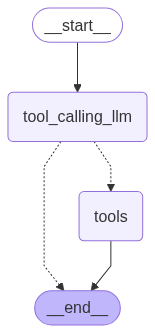

In [29]:
# builder.add_edge(START,'tool_calling_llm')
# builder.add_conditional_edges(
#     'tool_calling_llm',
#     tools_condition
# )

# builder.add_edge('tools',END)

# graph = builder.compile()
# display(Image(graph.get_graph().draw_mermaid_png()))

In [31]:
messages = graph.invoke({'messages':'1706.03762'})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_mg7eoB9XpTnfcVfs6fhKVQph)
 Call ID: call_mg7eoB9XpTnfcVfs6fhKVQph
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The do


In [32]:
messages = graph.invoke({'messages':'My name is Pradeep'})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

My name is Pradeep
================================== Ai Message ==================================

Hello Pradeep! How can I assist you today?


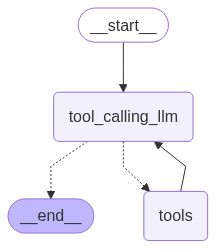

In [17]:
builder.add_edge(START,'tool_calling_llm')
builder.add_conditional_edges(
    'tool_calling_llm',
    tools_condition
)

builder.add_edge('tools','tool_calling_llm')

graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [18]:
messages = graph.invoke({'messages':'My name is Pradeep and help me with latest AI Info from June, 2025'})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

My name is Pradeep and help me with latest AI Info from June, 2025
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_cmkFnlFCRtnus2EUC6quyp9s)
 Call ID: call_cmkFnlFCRtnus2EUC6quyp9s
  Args:
    query: latest AI info June 2025
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://empathyfirstmedia.com/ai-trends-june-2025/", "content": "As we look at the AI landscape in June 2025, the rapid evolution of large language models (LLMs), innovative tools, and emerging functionalities continues to reshape industries. [...] AI tools have evolved significantly by June 2025, with a focus on accessibility and specialization. Text-to-video technologies, such as OpenAI’s Sora, have matured, enabling businesses to create professional-grade video content from simple